In [209]:
import pandas as pd
import numpy as np

np.random.seed(40)

In [210]:
car_sales = pd.read_csv('final_car_sales.csv')

In [211]:
odometer = car_sales["Odometer (KM)"]
price = car_sales["Price"]
car_sales = car_sales.drop(columns=["Unnamed: 0","Price","Odometer (KM)"])
car_sales

,Make,Colour,Doors
0,Honda,White,4.0
1,BMW,Blue,5.0
2,Honda,White,4.0
3,Toyota,White,4.0
4,Nissan,Blue,3.0
...,...,...,...
897,BMW,Blue,3.0
898,Toyota,Black,4.0
899,Nissan,Blue,4.0
900,Honda,White,4.0


In [212]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
X = one_hot_encoder.fit_transform(car_sales).toarray()
feature_name = one_hot_encoder.get_feature_names()
car_sales = pd.DataFrame(X,columns=feature_name)

In [213]:
car_sales = pd.concat((car_sales,odometer),axis=1)
car_sales = pd.concat((car_sales,price),axis=1)
car_sales

,x0_BMW,x0_Honda,x0_Nissan,x0_Toyota,x1_Black,x1_Blue,x1_Green,x1_Red,x1_White,x2_3.0,x2_4.0,x2_4.01,x2_5.0,Odometer (KM),Price
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,163322.0,31666.0
898,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,35820.0,32042.0
899,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,66604.0,31570.0
900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,215883.0,4001.0


In [214]:
from sklearn.model_selection import train_test_split

X = car_sales.drop(columns=['Price'])
y = car_sales['Price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)


In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
rfr = RandomForestRegressor(n_estimators=90)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=90, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

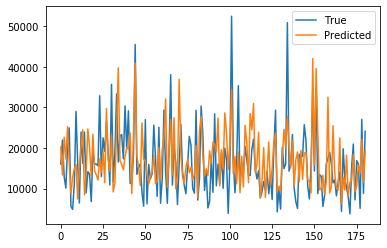

In [216]:
y_pred = np.array(rfr.predict(X_test))
result = np.vstack((y_test,y_pred)).transpose()
result = pd.DataFrame(result,columns=['True','Predicted'])
result.plot()

In [217]:
rfr.score(X_test,y_test)

0.19800238718672114

In [218]:
# Saving model

import pickle

pickle.dump(rfr,open("car_sales_1.pk1","wb"))